###### 겨리 - 2020/12/22
### **행렬식 - 라이프니츠 공식**
#### 행렬식의 정의와 응용
#### - 연산 : 
#####  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    1. 행렬식의 정의와 구현
#####  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    2. 행렬의 스칼라배
#####  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    3. 행렬의 곱셈

In [9]:
import random
import numpy as np

# 
### 1.행렬식(determinant)
##### 치환(순열)을 사용한 정의 : 라이프니츠 공식
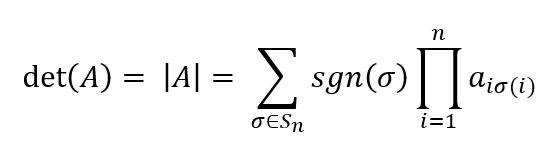

#### 치환(Permutation = 순열)
##### 원소들의 순서를 바꾸어 재배열하는 것

In [167]:
#랜덤 행렬 생성(1~20 사이의 정수)
def random_matrix(rows,cols, max_no=10):
    row_list=[]
    for r in range(rows):
        col_list=[]
        for c in range(cols):
            col_list.append(float(random.randint(0,max_no))) #float형으로 변환함
        row_list.append(col_list)
        
    return np.array(row_list) #넘파이 배열 형태로 변환

A=random_matrix(2,2)

In [168]:
def permutation(array, k):
    order = [] #순서쌍을 담을 공간
    n = len(array)
    
    if k == 1:
        for element in array: #원소가 최종적으로 하나만 남는 경우
            order.append([element])

    elif k > 1:
        for i in range(n):
            A = array.copy()
            element = A.pop(i)


            for sub in permutation(A,k-1): #재귀함수의 결과를 순차적으로 추출
                #입력된 변수의 결과를 sub에 순차적으로 출력하나, 도중에 하위 재귀를 만났을때는 하위재귀부터 처리함(if k==1이 아닌 경우)
                order.append([element]+sub)    
    return  order

In [169]:
def determinant(matrix):
    #행렬식 추출하기
    dim = len(matrix)

    det = 0 

    for sigma_i in  permutation(list(range(dim)),dim): #순열 가짓수만큼 시행

        sgn_sigma, fact, cnt = 1, 1,0 #sgn_sigma : 홀치환/짝치환 결과, fact : 각 원소들의 계승, cnt :각 순열의 치환 횟수을 집계
        for ai in range(dim): #1열부터 sigma 함수 적용
            cnt += sum([sigma_i[ai] > sigma_i[num] for num in range(ai, dim)]) #각 원소의 치환 횟수를 집계
            fact *= A[ai][sigma_i[ai]] #원소끼리 곱셈(계승)

        sgn_sigma *= (-1)**cnt #홀치환이면 음수, 짝치환이면 양수 부여


        det += fact *sgn_sigma #행렬식 계산
        
    return det

In [170]:
A=random_matrix(3,3)
print(A)

[[ 1.  6.  1.]
 [ 3. 10.  8.]
 [ 1.  5.  8.]]


In [171]:
determinant(A)

-51.0

#### 행렬식을 같이 추출하는 함수

In [246]:
def determinant_calculation(matrix):
    #행렬식 추출하기
    dim = len(matrix)
    det = 0 
    temp_list_2 = []
    
    
    print("Matrix A : \n", A, "\n")
    for sigma_i in  permutation(list(range(dim)),dim): #순열 가짓수만큼 시행
        temp_list = []
        sgn_sigma, fact, cnt = 1, 1,0 #sgn_sigma : 홀치환/짝치환 결과, fact : 각 원소들의 계승, cnt :각 순열의 치환 횟수을 집계
        for ai in range(dim): #1열부터 sigma 함수 적용
            cnt += sum([sigma_i[ai] > sigma_i[num] for num in range(ai, dim)]) #각 원소의 치환 횟수를 집계
            fact *= A[ai][sigma_i[ai]] #원소끼리 곱셈(계승)
            
            temp_list.append(A[ai][sigma_i[ai]])
            
        sgn_sigma *= (-1)**cnt #홀치환이면 음수, 짝치환이면 양수 부여
        temp_list.append(sgn_sigma)
        
        temp_list_2.append(temp_list)

        det += fact *sgn_sigma #행렬식 계산
    
    print("Calculation = ", end = "")
    for row in temp_list_2[:-1]:
        print("("+str(row[-1])+") * (" , end="")
        [print(int(num), end = " * ") for num in row[:-2]]
        print(int(row[-2]), end = "")
        print(")", end = " + ")
    
    last_row = temp_list_2[-1]
    print("("+str(last_row[-1])+") * (" , end="")
    [print(int(num), end = " * ") for num in last_row[:-2]]
    print(int(last_row[-2]), end="")
    print(")")
    print("Det(A) :",det)
    
    return 

In [247]:
A=random_matrix(2,2)

In [248]:
determinant_calculation(A)

Matrix A : 
 [[ 5.  1.]
 [ 0. 10.]] 

Calculation = (1) * (5 * 10) + (-1) * (1 * 0)
Det(A) : 50.0


#### * 0행이 한 줄이라도 있으면 Det(A) = 0이며 비가역행렬이다.

##### 참고 자료 : https://m.blog.naver.com/CommentList.nhn?blogId=lcuh11&logNo=220755451414
##### 순열 관련 : https://medium.com/@dltkddud4403/python-%EC%88%9C%EC%97%B4-%EC%A1%B0%ED%95%A9-%EA%B5%AC%ED%98%84-5e496e74621c